# Import necessary packages

In [1]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats  
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy.spatial.distance import cdist


from datetime import datetime
from google.colab import drive

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


# PART A

**CONTEXT**: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5
continuous attributes.

**PROJECT OBJECTIVE**: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

In [2]:
# Read ‘Car name.csv’ as a DataFrame and assign it to a variable
df_csv = pd.read_csv('/content/drive/My Drive/AIML/Unsupervised Learning/Project/Car_name.csv')
car_name_df = df_csv
print(car_name_df.head())

                    car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino


In [3]:
# Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.
df_json = pd.read_json('/content/drive/My Drive/AIML/Unsupervised Learning/Project/Car_Attributes.json')
car_attr_df = df_json
print(car_attr_df.head())

    mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1


In [4]:
# Merge both the DataFrames together to form a single DataFrame
# horizontally concatenate the two dataframes
df_merged = pd.concat([car_name_df, car_attr_df], axis=1)

# display the merged dataframe
print(df_merged.head())

                    car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1


In [5]:
# Print 5 point summary of the numerical features and share insights. 
df_merged.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
print("Data Type = \n", df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
Data Type = 
 None


In [7]:
# 2. h
df_merged['hp'] = pd.to_numeric(df_merged['hp'], errors='coerce')
df_merged[df_merged['hp'].isna()]

mean_hp = df_merged['hp'].mean()
print("mean_hp = \n", mean_hp)

# replace NaN values with the mean value
df_merged['hp'] = df_merged['hp'].fillna(mean_hp)
print("Data Type = \n", df_merged.info())

mean_hp = 
 104.46938775510205
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
Data Type = 
 None


In [8]:
# Print 5 point summary of the numerical features and share insights. 
df_merged.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
# check for duplicate rows in the dataframe
duplicates = df_merged.duplicated()

num_duplicates = duplicates.sum()

# print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


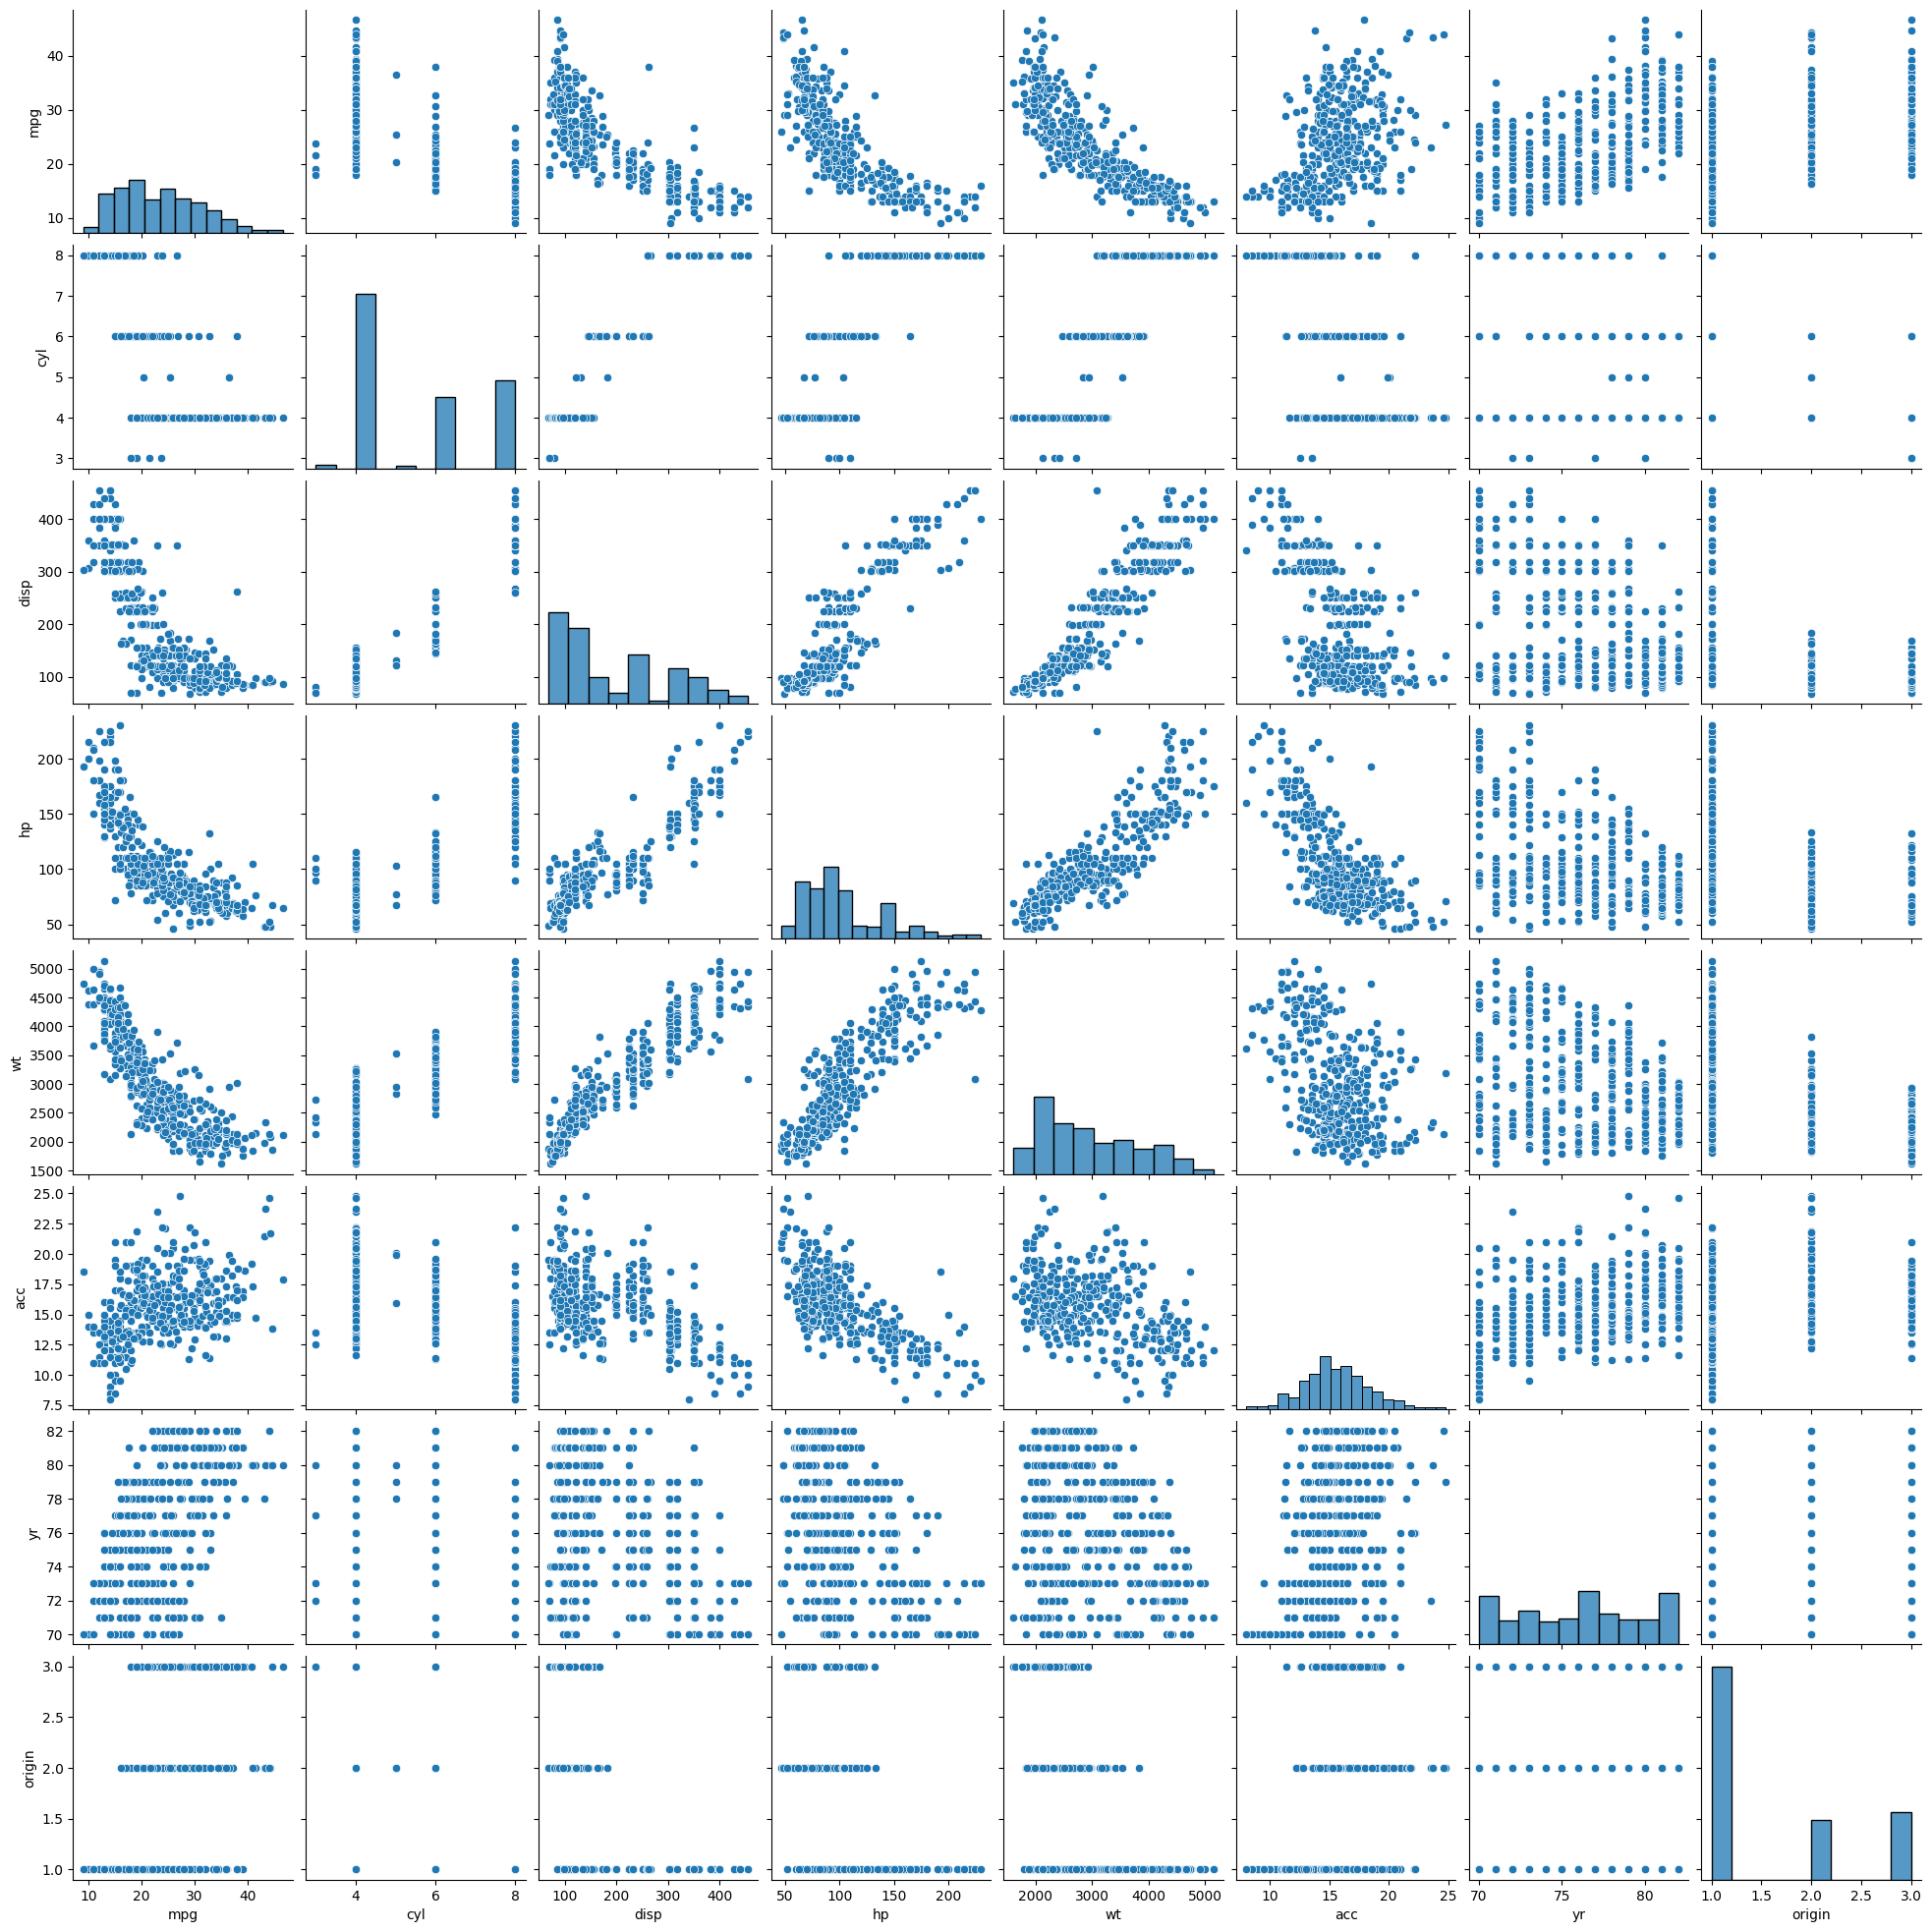

In [10]:
#3.C Visualize a pairplot with 3 classes distinguished by colors and share insights
sns.pairplot(df_merged);


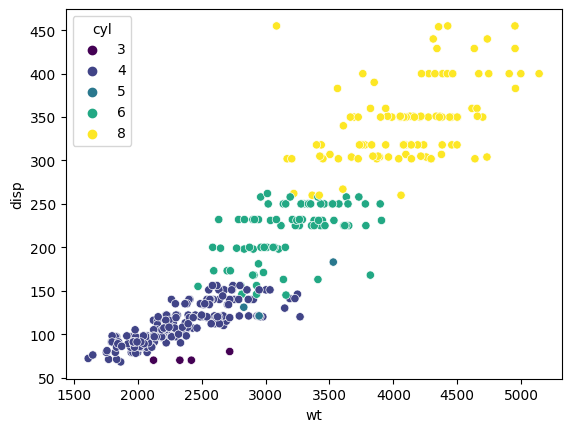

In [11]:
# Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 
sns.scatterplot(data=df_merged, x='wt', y='disp', hue='cyl', palette='viridis');

**Observation from scatterplot -** 
1. There is defnitely positive correlation between wt and displacement.
2. It shows formation of groups of data points that may have similar characteristics   

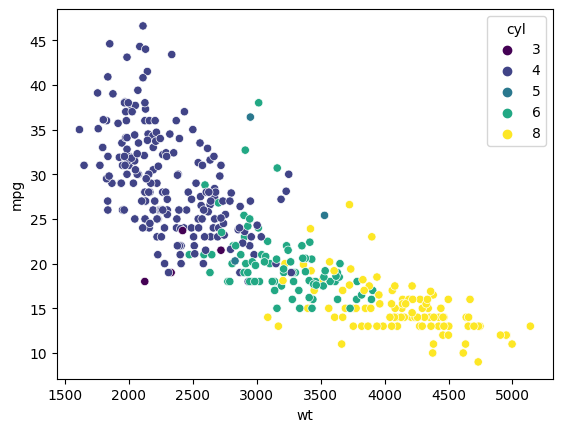

In [12]:
# Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. 
sns.scatterplot(data=df_merged, x='wt', y='mpg', hue='cyl', palette='viridis');

**Observation from scatterplot -** 
1. Negative correlation between wt and mpg, higher the wt lower mpg.
2. It shows formation of groups of data points that may have similar characteristics.   

In [13]:
df_wo_carName=df_merged.iloc[:,1:]
df_Scaled=df_wo_carName.apply(zscore)
print(df_Scaled.head())


        mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.706439  1.498191  1.090604  0.669196  0.630870 -1.295498 -1.627426   
1 -1.090751  1.498191  1.503514  1.586599  0.854333 -1.477038 -1.627426   
2 -0.706439  1.498191  1.196232  1.193426  0.550470 -1.658577 -1.627426   
3 -0.962647  1.498191  1.061796  1.193426  0.546923 -1.295498 -1.627426   
4 -0.834543  1.498191  1.042591  0.931311  0.565841 -1.840117 -1.627426   

     origin  
0 -0.715145  
1 -0.715145  
2 -0.715145  
3 -0.715145  
4 -0.715145  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

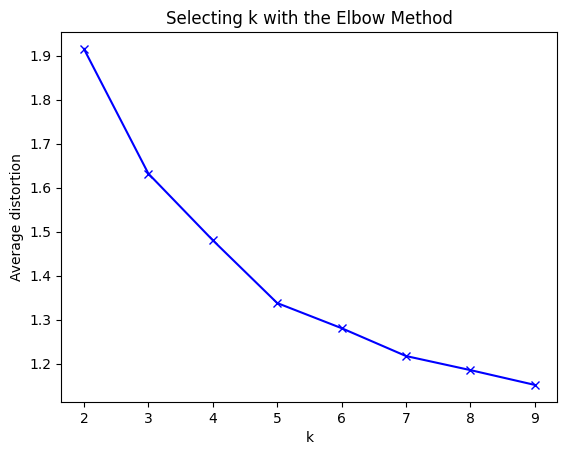

In [14]:
#Finding optimal no. of clusters
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_Scaled)
    prediction=model.predict(df_Scaled)
    meanDistortions.append(sum(np.min(cdist(df_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


**Observation** - 
Possible Elbow points is 5, 6 and 7. i think best will be 5 as after that not very siginificant changes in distortion.

In [15]:
# Train a K-means clustering model once again on the optimal number of clusters.

# Final model with cluster size K = 5
final_model=KMeans(5)
final_model.fit(df_Scaled)
prediction=final_model.predict(df_Scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Add a new feature in the DataFrame which will have labels based upon cluster value.
df_merged["GROUP"] = prediction
df_Scaled["GROUP"] = prediction
print("Groups Assigned : \n", df_merged.head())

Groups Assigned : 
                     car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   GROUP  
0      1  
1      1  
2      1  
3      1  
4      1  


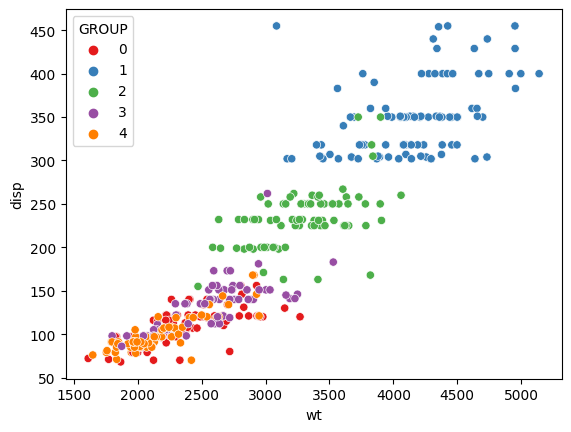

In [17]:
# Plot a visual and color the datapoints based upon clusters.

sns.scatterplot(data=df_merged, x='wt', y='disp', hue='GROUP', palette='Set1');


In [18]:
# Check the number of data in each cluster

labels = final_model.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[84 94 81 67 72]


In [19]:
# define the new JSON data as a string
json_string = '''
[
  {
    "car_name" : "Ritesh v1",
    "mpg": 18,
    "cyl": 8,
    "disp": 320,
    "hp": 180,
    "wt": 3600,
    "acc": 11,
    "yr": 70,
    "origin": 1
  },
  {
    "car_name" : "Ritesh v2",
    "mpg": 25,
    "cyl": 6,
    "disp": 250,
    "hp": 105,
    "wt": 2500,
    "acc": 12,
    "yr": 70,
    "origin": 1
  }
]
'''
df_test = pd.read_json(json_string)

print(df_test)

    car_name  mpg  cyl  disp   hp    wt  acc  yr  origin
0  Ritesh v1   18    8   320  180  3600   11  70       1
1  Ritesh v2   25    6   250  105  2500   12  70       1


In [20]:
df_merged_test = df_test.append(df_merged, ignore_index=True)
df_merged_test = df_merged_test.drop('GROUP', axis=1)

df_wo_carName_test=df_merged_test.iloc[:,1:]
df_Scaled_test=df_wo_carName_test.apply(zscore);

final_model_test=KMeans(5)
final_model_test.fit(df_Scaled_test)
prediction=final_model_test.predict(df_Scaled_test)

# Add a new feature in the DataFrame which will have labels based upon cluster value.
df_merged_test["GROUP"] = prediction
df_Scaled_test["GROUP"] = prediction
print("Groups Assigned for New data Points Ritesh V1 & V2 : \n", df_merged_test.head())


<ipython-input-20-175e333b9720>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged_test = df_test.append(df_merged, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Groups Assigned for New data Points Ritesh V1 & V2 : 
                     car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0                  Ritesh v1  18.0    8  320.0  180.0  3600  11.0  70       1   
1                  Ritesh v2  25.0    6  250.0  105.0  2500  12.0  70       1   
2  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
3          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
4         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   

   GROUP  
0      1  
1      2  
2      1  
3      1  
4      1  


Group for new added datacar_name "Ritesh v1" and "Ritesh v2" are in different groups and group id assigned.

# PART B

**CONTEXT**: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.

**PROJECT OBJECTIVE:** Apply dimensionality reduction technique – PCA and train a model and compare relative results


In [21]:
# Read ‘vehicle.csv’ as a DataFrame and assign it to a variable
df_vehicle = pd.read_csv('/content/drive/My Drive/AIML/Unsupervised Learning/Project/vehicle.csv')

print(df_vehicle.shape)

(846, 19)


In [22]:
missing_values = df_vehicle.isna().mean() * 100
print("percentage of missing values  = \n", missing_values)

percentage of missing values  = 
 compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


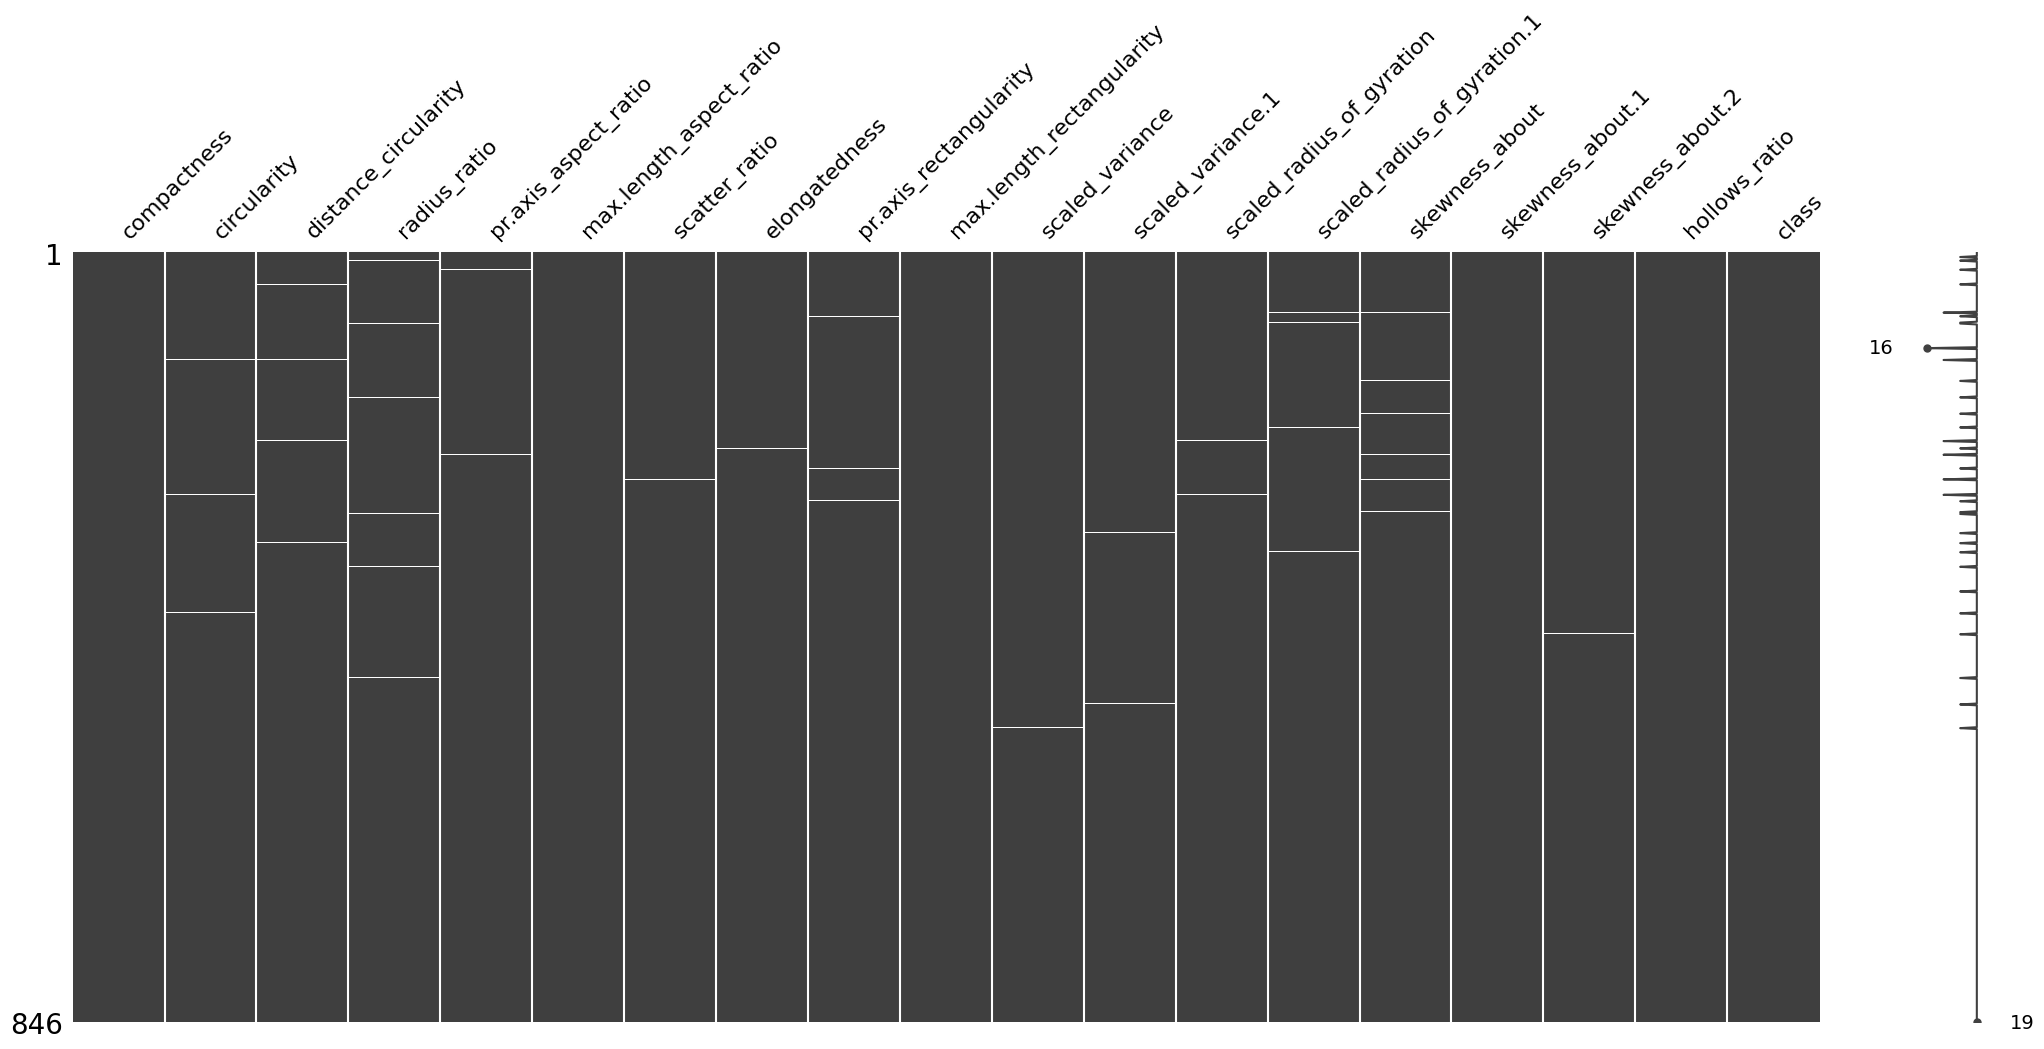

In [ ]:
import missingno as msno
msno.matrix(df_vehicle)
plt.show()

In [ ]:
df_filled = df_vehicle.fillna(df_vehicle.mean())

<ipython-input-47-c351fac770d6>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df_vehicle.fillna(df_vehicle.mean())


In [ ]:
missing_values = df_filled.isna().mean() * 100
print("percentage of missing values  = \n", missing_values)

percentage of missing values  = 
 compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64


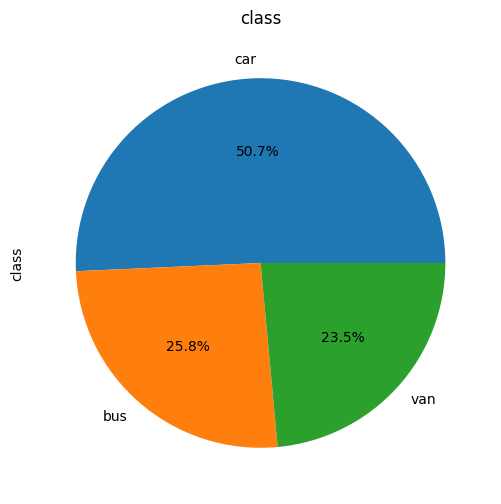

In [ ]:
feature_counts = df_filled['class'].value_counts()
feature_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('class')
plt.show()

In [ ]:
# check for duplicate rows in the dataframe
duplicates = df_filled.duplicated()
num_duplicates = duplicates.sum()
# print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
X = df_filled.drop("class" , axis=1)
Y = df_filled.pop("class")

In [ ]:
# 3.B Split data into train and test. Keep 20% data reserved for testing. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=4)
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df_filled.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df_filled.index)) * 100))

79.91% data is in training set
20.09% data is in test set


In [ ]:
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.fit_transform(X)


In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)

print('Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('Precision metrics on test Data :', round(precision_score(y_test, y_pred,average='macro'),2) )
print('Recall metrics on test Data :', round(recall_score(y_test, y_pred,average='macro'),2) )
print('F1-score metrics on test Data:', round(f1_score(y_test, y_pred,average='macro'),2))
print('Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))

Accuracy metrics on test Data : 0.98
Precision metrics on test Data : 0.97
Recall metrics on test Data : 0.98
F1-score metrics on test Data: 0.97
Confusion matrix on test Data :
  [[41  0  1]
 [ 0 86  2]
 [ 1  0 39]]


In [ ]:
# Apply PCA on the data with 10 components. 
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit(X_scaled)

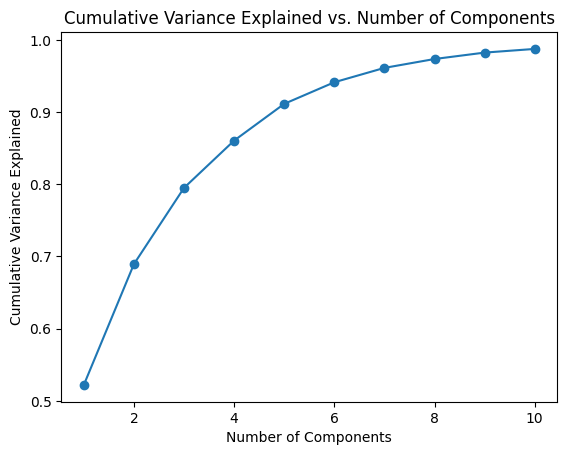

In [ ]:
# Calculate the cumulative explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained vs. Number of Components')
plt.show()

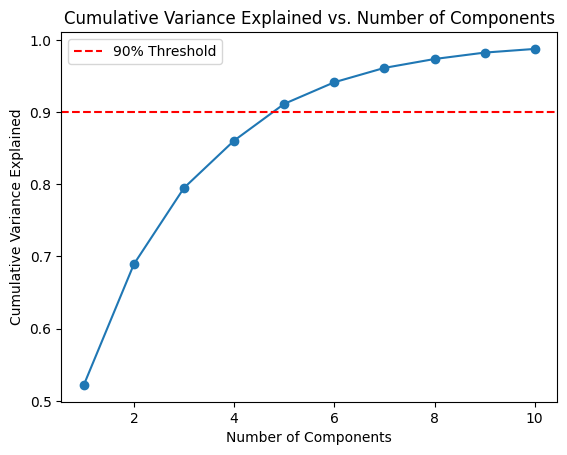

In [ ]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained vs. Number of Components')

# Draw a horizontal line at the threshold of 90%
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.legend()
plt.show()

In [ ]:
min_components = np.argmax(explained_variance_ratio >= 0.9) + 1
print("min_components", min_components)

# Apply PCA with the selected number of components
pca_min = PCA(n_components=min_components)
#X_pca_mi = pca_min.fit(X_scaled)
X_pca_min = pca_min.fit_transform(X_scaled)

min_components 5


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_min, Y, test_size=0.20, random_state=4)

# Train an SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy
print('Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('Precision metrics on test Data :', round(precision_score(y_test, y_pred,average='macro'),2) )
print('Recall metrics on test Data :', round(recall_score(y_test, y_pred,average='macro'),2) )
print('F1-score metrics on test Data:', round(f1_score(y_test, y_pred,average='macro'),2))
print('Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))


Accuracy metrics on test Data : 0.8
Precision metrics on test Data : 0.77
Recall metrics on test Data : 0.77
F1-score metrics on test Data: 0.77
Confusion matrix on test Data :
  [[33  6  3]
 [ 3 76  9]
 [ 9  4 27]]


**Observation** - when we build SVM model with min componenet giving us 90% Cumulative Variance. We found that Accuracy of model on test data drop significantly - from 98% to 80% 



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf', 'linear']}

grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)

# Fit the RandomizedSearchCV object to the data
grid.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.563 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.618 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.696 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.719 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.600 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# Use the best hyperparameters to fit the model
best_svm = SVC(**grid.best_params_)
best_svm.fit(X_train, y_train)

Best hyperparameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=10, gamma=0.1)

In [ ]:
# Predict on the test set
y_pred = best_svm.predict(X_test)

# Calculate the accuracy
print('Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
print('Precision metrics on test Data :', round(precision_score(y_test, y_pred,average='macro'),2) )
print('Recall metrics on test Data :', round(recall_score(y_test, y_pred,average='macro'),2) )
print('F1-score metrics on test Data:', round(f1_score(y_test, y_pred,average='macro'),2))
print('Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))


Accuracy metrics on test Data : 0.83
Precision metrics on test Data : 0.81
Recall metrics on test Data : 0.81
F1-score metrics on test Data: 0.8
Confusion matrix on test Data :
  [[37  4  1]
 [ 4 77  7]
 [ 9  4 27]]


**Observation** -
After using GridSearch to find best hyper parameter and train model on that model is shwoing significant improvment in follwoing aspect - 
1. Accuracy metrics improved from 0.8 to 0.83 on test Data.
2. Precision metrics improved from 0.77 to 0.81 on test Data.
3. Recall metrics improved from 0.77 to 0.81 on test Data.
4. F1-score metrics improved from 0.8 to 0.83 on test Data

**Explain pre-requisite/assumptions of PCA.**

Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and data analysis. Adhering to these prerequisites helps ensure the reliability and meaningful interpretation of the results obtained from PCA. Following are prerequisites and assumptions of PCA:

1. Linear Relationships: PCA assumes that the variables in the dataset have linear relationships. If the variables have nonlinear relationships, PCA may not be the most appropriate technique.

2. Numerical Variables: PCA works with numerical variables. Categorical or ordinal variables need to be converted into numerical form before applying PCA.

3. Missing Data: PCA assumes that the dataset is complete without missing values. Missing data should be handled before applying PCA. You can either impute missing values or remove the observations with missing values.

4. Scale of Variables: PCA is sensitive to the scale of variables. It is recommended to standardize or normalize the variables before applying PCA.

5. Large Variance Matters: PCA assumes that variables with larger variances contribute more to the total variation in the dataset. Variables with smaller variances are considered less important in determining the principal components.

6. Independence of Components: PCA assumes that the principal components are uncorrelated to each other. This implies that the components capture distinct and independent sources of variation in the data.

**Explain advantages and limitations of PCA.**

Principal Component Analysis (PCA) is a dimensionality reduction technique that provides several advantages and also has some limitations. some of Advantages & Limitations are following :

**Advantages of PCA:**

1. Dimensionality Reduction: PCA reduces the dimensionality of the dataset by transforming the original variables into a new set of uncorrelated variables called principal components. It helps to represent the data in a lower-dimensional space while retaining most of the important information.

2. Data Visualization: PCA allows for visualizing high-dimensional data in a lower-dimensional space. By plotting the data points along the principal components, it becomes easier to visualize patterns, clusters, and relationships among variables.

3. Feature Selection: PCA helps in identifying the most important features or variables in the dataset. The principal components with higher variances capture the most significant information, enabling researchers to focus on the key variables.

4. Noise Reduction: PCA can effectively reduce the impact of noise or irrelevant information present in the dataset without losing much information.

5. Multicollinearity Handling: PCA addresses the issue of multicollinearity, which occurs when there are high correlations among predictor variables.

**Limitations of PCA:**

1. Loss of Interpretability: After applying PCA, the resulting principal components may not have direct interpretability in terms of the original variables. It becomes challenging to understand the precise meaning of each principal component.

2. Information Loss: Although PCA retains most of the important information in the dataset, there is always some loss of information during dimensionality reduction. The variance explained by the reduced set of principal components may be slightly less than the original dataset.

3. Linearity Assumption: PCA assumes that the relationships among variables are linear. If the dataset contains nonlinear relationships, PCA may not be the most suitable technique for dimensionality reduction.

4. Computational Complexity: Applying PCA to large datasets can be computationally expensive, especially when the number of variables or observations is very high. It requires the computation of eigenvectors and eigenvalues, which can be resource-intensive.